In [177]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [30]:
data = pd.read_csv("car_theft_india.csv")

In [69]:
data.head()

,Case_ID,Theft_Date,Report_Date,Car_Brand,Car_Model,Year_of_Manufacture,Car_Type,Fuel_Type,Color,Registered_State,...,Police_Station,Is_Recovered,Recovery_Date,Suspect_Identified,Number_of_Prev_Thefts,GPS_Installed,CCTV_Availability,Insurance_Status,Owner_Age_Group,Report_Delay
0,1,2023-10-20,2023-10-23,Renault,Kwid,2021,Pickup,CNG,Blue,Delhi,...,PS-41,No,NaT,No,2,No,Yes,No Insurance,26-40,3 days
1,2,2023-07-03,2023-07-10,Tata,Nexon,2005,Sedan,Diesel,Black,Delhi,...,PS-41,No,NaT,No,0,No,No,Valid,41-60,7 days
2,3,2023-03-30,2023-03-30,Nissan,Magnite,2008,Hatchback,CNG,Yellow,Maharashtra,...,PS-15,No,NaT,No,0,No,No,Valid,60+,0 days
3,4,2023-09-05,2023-09-10,Hyundai,Verna,2009,Hatchback,CNG,Green,Delhi,...,PS-25,No,NaT,No,1,No,Yes,Expired,60+,5 days
4,5,2023-05-09,2023-05-14,Honda,Amaze,2008,SUV,CNG,Green,Delhi,...,PS-23,No,NaT,No,1,No,Yes,Valid,18-25,5 days


In [11]:
remove = ["Car_Brand","Car_Model","Year_of_Manufacture","Car_Type","Fuel_Type"]
data.drop(remove, axis = 1, inplace = True)

In [57]:
data['Theft_Date'] = pd.to_datetime(data['Theft_Date'])
data['Report_Date'] = pd.to_datetime(data['Report_Date'])
data["Recovery_Date"] = data["Recovery_Date"].replace("", np.nan)
data["Recovery_Date"] = pd.to_datetime(data["Recovery_Date"])

## Basic Analysis

- Find the total number of theft cases recorded in the dataset.
- Count the number of unique car brands involved in thefts.
- Identify the top 5 most stolen car models.
- Find the most common fuel type among stolen cars.
- Get the number of thefts reported for each state.

In [28]:
data["Case_ID"].count()

10000

In [40]:
data["Car_Brand"].nunique()

10

In [44]:
data["Car_Model"].value_counts().head()

Car_Model
Aspire     360
Scorpio    352
Kwid       348
Carens     341
Kicks      339
Name: count, dtype: int64

In [48]:
data["Fuel_Type"].value_counts().head(1)

Fuel_Type
Diesel    2591
Name: count, dtype: int64

In [54]:
data["Registered_State"].value_counts()

Registered_State
Gujarat           1047
Rajasthan         1040
Maharashtra       1009
Punjab            1007
West Bengal       1004
Karnataka          990
Tamil Nadu         989
Madhya Pradesh     986
Delhi              970
Uttar Pradesh      958
Name: count, dtype: int64

## Time-Based Analysis

- Find the average delay (in days) between theft and report dates.
- Determine which month had the highest number of thefts.
- Identify the most common time of the day for car thefts (Morning, Afternoon, Evening, Night).
- Find the average recovery time for recovered vehicles.

In [67]:
data["Report_Delay"] = (data["Report_Date"] - data["Theft_Date"])

In [87]:
data["Report_Delay"].mean()

Timedelta('3 days 12:45:12.960000')

In [107]:
data["Theft_Date"].dt.month.value_counts().idxmax()

5

In [105]:
data["Time_of_Theft"].value_counts().idxmax()

'Evening'

In [109]:
data["Recovery_Time"] = (data["Recovery_Date"] - data["Theft_Date"]).dt.days

In [111]:
data["Recovery_Time"].mean()

18.471884248602432

In [120]:
data.head()

,Case_ID,Theft_Date,Report_Date,Car_Brand,Car_Model,Year_of_Manufacture,Car_Type,Fuel_Type,Color,Registered_State,...,Is_Recovered,Recovery_Date,Suspect_Identified,Number_of_Prev_Thefts,GPS_Installed,CCTV_Availability,Insurance_Status,Owner_Age_Group,Report_Delay,Recovery_Time
0,1,2023-10-20,2023-10-23,Renault,Kwid,2021,Pickup,CNG,Blue,Delhi,...,No,NaT,No,2,No,Yes,No Insurance,26-40,3 days,NaN
1,2,2023-07-03,2023-07-10,Tata,Nexon,2005,Sedan,Diesel,Black,Delhi,...,No,NaT,No,0,No,No,Valid,41-60,7 days,NaN
2,3,2023-03-30,2023-03-30,Nissan,Magnite,2008,Hatchback,CNG,Yellow,Maharashtra,...,No,NaT,No,0,No,No,Valid,60+,0 days,NaN
3,4,2023-09-05,2023-09-10,Hyundai,Verna,2009,Hatchback,CNG,Green,Delhi,...,No,NaT,No,1,No,Yes,Expired,60+,5 days,NaN
4,5,2023-05-09,2023-05-14,Honda,Amaze,2008,SUV,CNG,Green,Delhi,...,No,NaT,No,1,No,Yes,Valid,18-25,5 days,NaN


In [124]:
data.columns

Index(['Case_ID', 'Theft_Date', 'Report_Date', 'Car_Brand', 'Car_Model',
       'Year_of_Manufacture', 'Car_Type', 'Fuel_Type', 'Color',
       'Registered_State', 'Registered_City', 'Location_of_Theft',
       'Time_of_Theft', 'Police_Station', 'Is_Recovered', 'Recovery_Date',
       'Suspect_Identified', 'Number_of_Prev_Thefts', 'GPS_Installed',
       'CCTV_Availability', 'Insurance_Status', 'Owner_Age_Group',
       'Report_Delay', 'Recovery_Time'],
      dtype='object')

## Location-Based Analysis

- List the top 3 cities with the most car thefts.
- Find out which police station handled the highest number of theft cases.
- Analyze which locations (Location_of_Theft) are most prone to car thefts.

In [118]:
data["Registered_City"].value_counts().head(3)

Registered_City
Mumbai      363
Vadodara    362
Udaipur     360
Name: count, dtype: int64

In [134]:
data["Police_Station"].value_counts().idxmax()

'PS-59'

In [136]:
data["Location_of_Theft"].value_counts().idxmax()

'Area-46'

## Recovery & Investigation

- Calculate the percentage of cars that were recovered.
- Identify the percentage of cases where the suspect was identified.
- Find the most common car color among recovered vehicles.

In [153]:
(data["Is_Recovered"].str.lower() == "yes").mean() * 100

30.409999999999997

In [155]:
(data["Suspect_Identified"].str.lower() == "yes").mean() * 100

20.18

In [161]:
data[data["Is_Recovered"].str.lower() == "yes"]["Color"].value_counts().idxmax()

'Silver'

## Advanced Analysis

- Analyze if having GPS installed affects the chances of recovery.
- Check if CCTV availability at the theft location improves recovery rates.
- Find the average number of previous thefts for vehicles that were successfully recovered.
- Identify the relationship between car age (Year_of_Manufacture) and the likelihood of theft.


In [165]:
data.groupby("GPS_Installed")["Is_Recovered"].value_counts(normalize=True).unstack() * 100

Is_Recovered,No,Yes
GPS_Installed,,
No,69.471033,30.528967
Yes,69.765142,30.234858


In [169]:
data.groupby("CCTV_Availability")["Is_Recovered"].value_counts(normalize=True).unstack() * 100

Is_Recovered,No,Yes
CCTV_Availability,,
No,69.485441,30.514559
Yes,69.695146,30.304854


In [171]:
data[data["Is_Recovered"].str.lower() == "yes"]["Number_of_Prev_Thefts"].mean()

1.0095363367313384

## Visualization Ideas
- Plot a bar chart showing the number of thefts by car brand.
- Create a pie chart showing theft distribution by fuel type.
- Visualize the monthly trend of car thefts using a line chart.

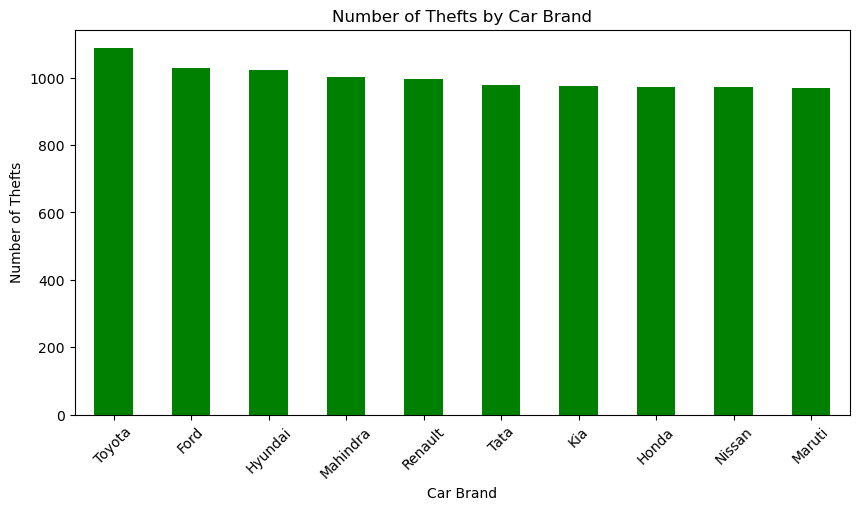

In [185]:
plt.figure(figsize=(10, 5))
data["Car_Brand"].value_counts().plot(kind="bar", color="green")
plt.title("Number of Thefts by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Number of Thefts")
plt.xticks(rotation=45)
plt.show()

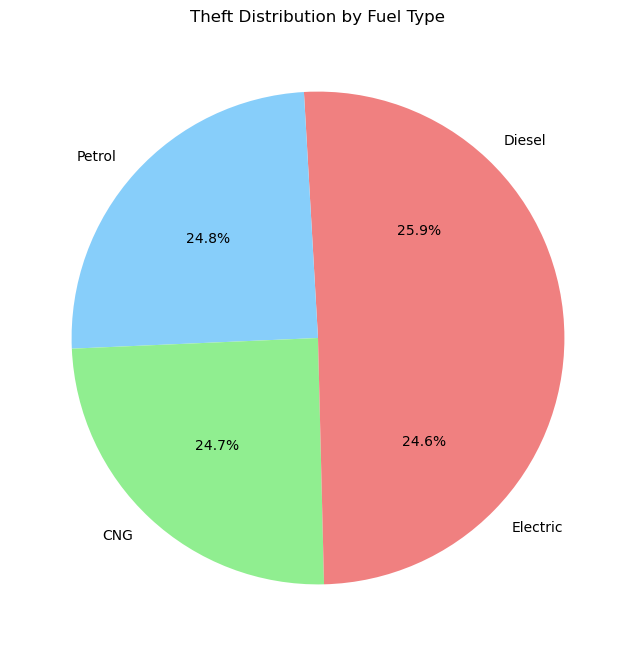

In [189]:
plt.figure(figsize=(8, 8))
data["Fuel_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["lightcoral", "lightskyblue", "lightgreen"])
plt.title("Theft Distribution by Fuel Type")
plt.ylabel("")
plt.show()

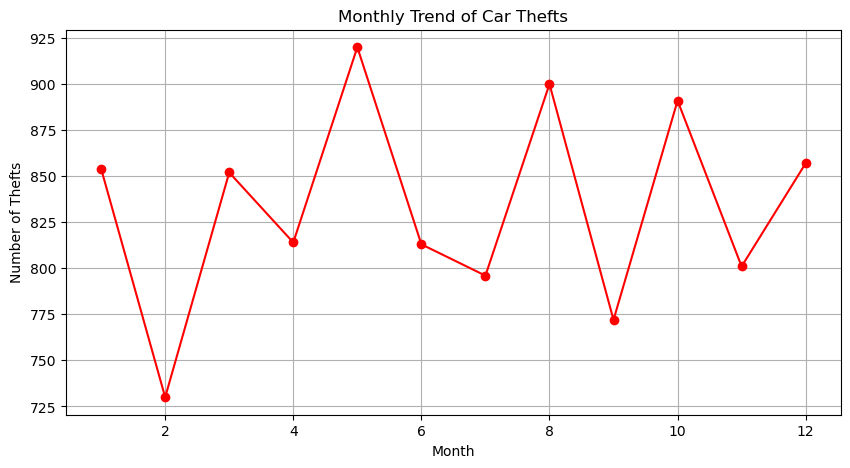

In [191]:
plt.figure(figsize=(10, 5))
data["Theft_Date"].dt.month.value_counts().sort_index().plot(kind="line", marker="o", color="red")
plt.title("Monthly Trend of Car Thefts")
plt.xlabel("Month")
plt.ylabel("Number of Thefts")
plt.grid()
plt.show()